In [133]:
import buurten as br
import pandas as pd
import matplotlib.pyplot as plt
import ssl
import geopandas as gpd
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import webbrowser

### RUN MODEL

In [134]:
# provincie_utrecht_gemeente =[
#     'Amersfoort',
#     'Baarn',
#     'Bunnik',
#     'Bunschoten',
#     'De Bilt',
#     'De Ronde Venen',
#     'Eemnes',
#     'Houten',
#     'Leusden',
#     'Lopik',
#     'Montfoort',
#     'Nieuwegein',
#     'Oudewater',
#     'Renswoude',
#     'Rhenen',
#     'Soest',
#     'Stichtse Vecht',
#     'Utrecht',
#     'Utrechtse Heuvelrug',
#     'Veenendaal',
#     'Vijfheerenlanden',
#     'Wijk bij Duurstede',
#     'Woerden',
#     'Woudenberg',
#     'IJsselstein',
#     'Zeist'
# ]

# gemeente_selectie = provincie_utrecht_gemeente
gemeente_selectie = ['Houten', 'Utrecht']
# gemeente_selectie = ['Houten']
# gemeente_selectie = ['Utrecht']

clean_up = True
buurt_voor_selectie = 'Poorten'
n_predictions = 5

In [135]:

drop_buurten_houten = ['Buitengebied Houten West',
        'Buitengebied Houten Oost', "Dorp 't Goy", "'t Goyse Dorp",
        "Buitengebied 't Goy", "'t Waal", 'Tull',
        "Buitengebied Tull en 't Waal", 'Dorp Schalkwijk West',
        'Dorp Schalkwijk Oost', 'Buitengebied Schalkwijk West',
        'Buitengebied Schalkwijk Oost','Bruggen', 'Bogen', 'De Poel',
        'Schepen', 'Boten', 'Honen', 'Kaden', 'Vesten', 'De Staart',
        'Hof van Wulven', 'Rondweg Noord-Oost', 'Rondweg Noord-West',
        'Rondweg Zuid-Oost', 'Rondweg Zuid-West'
        'Bedrijventerrein Lageweide',
        'Haarzuilens en omgeving',
        'Bedrijventerrein en omgeving',
        'Utrecht Science Park', 'Bedrijvengebied Strijkviertel', 'Bedrijvengebied Papendorp','Rijnenburg', 'Poldergebied Overvecht' ,
                ]

<AxesSubplot: >

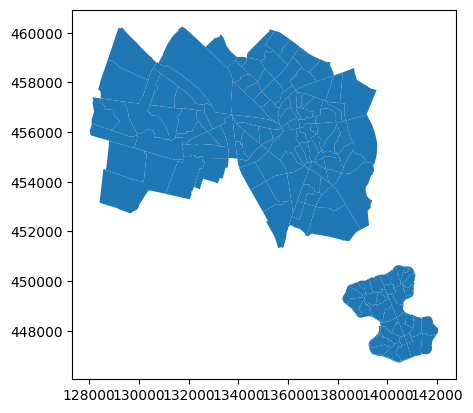

In [136]:
map = br.CreateMap(file_path ='../data/buurt_2020_v3.shp', 
                feature_column ='GM_NAAM', 
                feature_selection=gemeente_selectie, 
                feature_map_drop = 'BU_NAAM',
                drop_buurten_map=drop_buurten_houten)
gem_map = map.create_map(clean_up=clean_up) 
gem_map.plot()

In [137]:
buurten = pd.read_csv('../data/buurten.csv', index_col=0)
buurten = buurten.loc[buurten['gm_naam'].isin(gemeente_selectie)]
buurten = buurten.reset_index(drop=True)

In [138]:
### CHECK FOR WHICH BUURTEN WE DO NOT HAVE ENOUGH DATA
buurten = buurten.dropna()  #for now we just drop them
buurt_id = buurten[['buurt_code', 'regio']]
buurten = buurten.drop(['gm_naam', 'regio'], axis=1)

#create x and y var
y_id_buurten = pd.DataFrame(buurten['buurt_code'])
X = buurten[buurten.columns[~buurten.columns.isin(y_id_buurten.columns)]]


In [139]:
# X = X[['koopwoning_percentage', 'aardgasverbruik_m3_gemiddeld', 'social_economische_score_gemiddeld']]

In [140]:
print('the following columns are in the dataset to analyze: ', X.columns)

the following columns are in the dataset to analyze:  Index(['aantal_inwoners', 'aantal_inwoners_tussen_25_44_percentage',
       'aantal_huishoudens_met_kinderen_percentage',
       'gemiddelde_huishoudensgrootte', 'woningvoorraad',
       'gemiddelde_woningwaarde', 'meergezinswoning_percentage',
       'bewoond_percentage', 'koopwoning_percentage',
       'bouwjaar_vanaf_2000_percentage', 'afstand_tot_ziekenhuis_km',
       'afstand_tot_grote_supermarkt_km', 'afstand_tot_cafe_km',
       'afstand_tot_kinderdagverblijf_km',
       'afstand_tot_buitenschoolseopvang_km', 'afstand_tot_openbaar_groen_km',
       'afstand_tot_park_of_plantsoen_km', 'afstand_tot_bos_km',
       'afstand_tot_hoofdverkeersweg_km', 'afstand_tot_treinstation_km',
       'AfstandTotSemiOpenbaarGroenTotaal_83', 'leefbarometer_score',
       'leefbarometer_fysieke_omgeving', 'leefbarometer_fysieke_overlast',
       'leefbarometer_sociale_samenhang', 'leefbarometer_voorzieningen',
       'aardgasverbruik_m3_gemidde

De volgende buurten zijn aan te raden: ['Erven', 'Sloten', 'Akkers', 'Polders', 'Landen']


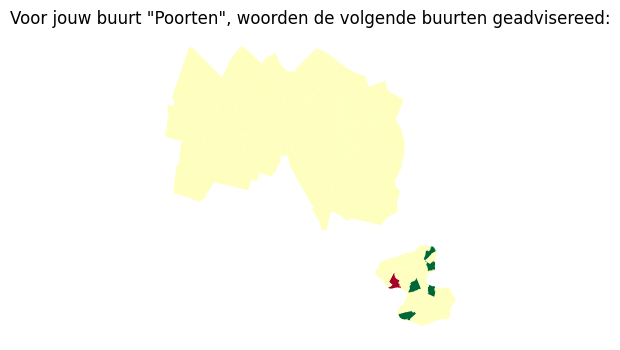

In [141]:
recommender = br.CosineRecommender(
        input_features = X,
        buurt_id= buurt_id,
        buurten= buurten,
        gem_map= gem_map
)

output, recommendations_naam, code_van_buurt, recommendations  = recommender.list_and_plot_generator(buurt_voor_selectie, n_predictions)
print(output, recommendations_naam)

In [142]:
### RENAME COLUMNS TO READABLE FORMAT
features_visualisatie = [ 'geometry', 'regio',
# 'buurt_code', 
'aantal_inwoners', 
'aantal_inwoners_tussen_25_44_percentage', 
'gemiddelde_huishoudensgrootte',
'woningvoorraad', 
'gemiddelde_woningwaarde', 
'meergezinswoning_percentage', 
'bewoond_percentage',
'koopwoning_percentage', 
'bouwjaar_vanaf_2000_percentage', 
# 'afstand_tot_grote_supermarkt_km', 
# 'afstand_tot_park_of_plantsoen_km', 
# 'afstand_tot_hoofdverkeersweg_km',
# 'afstand_tot_treinstation_km',
# 'leefbarometer_score', 
# 'aardgasverbruik_m3_gemiddeld', 
# 'elektriciteitsverbruik_kwh_gemiddeld',
# 'social_economische_score_gemiddeld', 
# 'geluid_van_treinverkeer',
# 'geluid_van_weg'
]

In [143]:
explore = br.ExploreRecommender(    
    gem_map = gem_map, 
    buurten = buurten,
    buurt_id = buurt_id,
    recommendations = recommendations,
    code_van_buurt = code_van_buurt
)

explore = explore.explore_visualizer(features_visualisatie)
explore.save('recommendations_map.html')
webbrowser.open('file://' + os.path.realpath('recommendations_map.html'))

True

### EXTRA FEATURE EXPLORATION

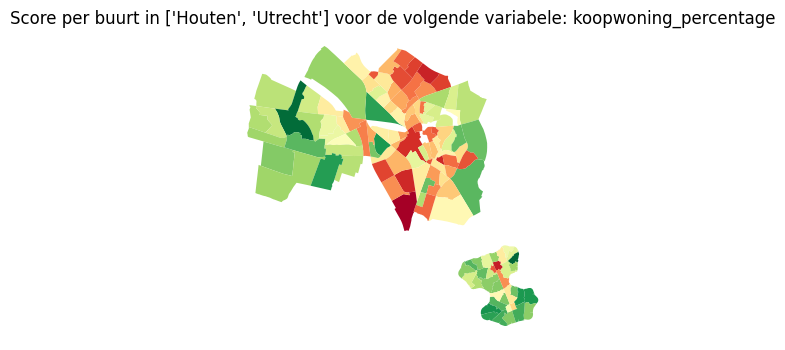

In [144]:
def create_plot_var(input_df: pd.DataFrame, map_df: pd.DataFrame, key: str, value: str):

       item = input_df[['buurt_code', value]]

       score_per_buurt =  pd.merge(map_df, item,
                     left_on = "BU_CODE", 
                     right_on = "buurt_code")

       # Maak een thematische kaart
       p = score_per_buurt.plot(column=value, 
                            figsize = (6,4),
                            cmap='RdYlGn')
       p.axis('off')
       p.set_title(f'Score per buurt in {gemeente_selectie} voor de volgende variabele: {key}')
       plt.show()
       
create_plot_var(buurten, gem_map, 'koopwoning_percentage', 'koopwoning_percentage')

In [145]:
subset = pd.DataFrame(buurten[['buurt_code', 'koopwoning_percentage']])
geometry = gem_map[['geometry', 'BU_CODE']]
geometry = geometry.merge(buurt_id, left_on='BU_CODE', right_on='buurt_code')
explore = geometry.merge(subset, left_on='BU_CODE', right_on='buurt_code', how='left')
explore = explore[explore.columns[explore.columns.isin(features_visualisatie)]]

explore_interaction = explore.explore(popup=True)
explore_interaction.save('recommendations_map.html')
webbrowser.open('file://' + os.path.realpath('recommendations_map.html'))


True

LET OP: GROEN IS HIERBIJ EEN LAGE WOZ WAARDE (goedkoper)!


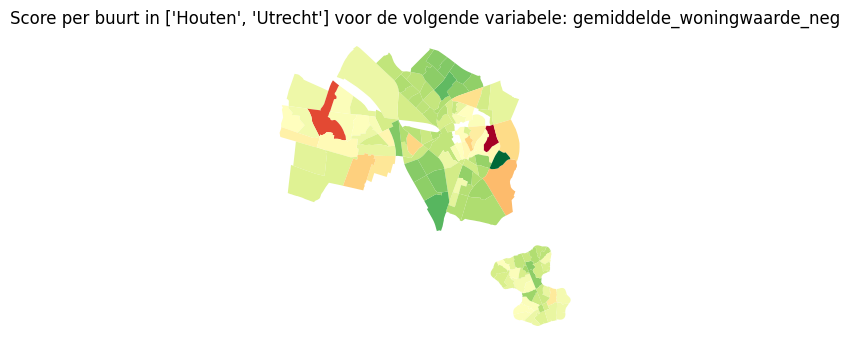

In [146]:
buurten['gemiddelde_woningwaarde_neg'] = buurten['gemiddelde_woningwaarde'] * -1
print('LET OP: GROEN IS HIERBIJ EEN LAGE WOZ WAARDE (goedkoper)!')
create_plot_var(buurten, gem_map, 'gemiddelde_woningwaarde_neg', 'gemiddelde_woningwaarde_neg')

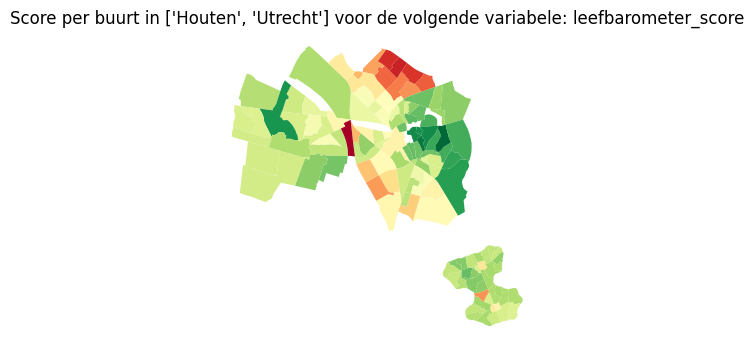

In [147]:
create_plot_var(buurten, gem_map, 'leefbarometer_score', 'leefbarometer_score')

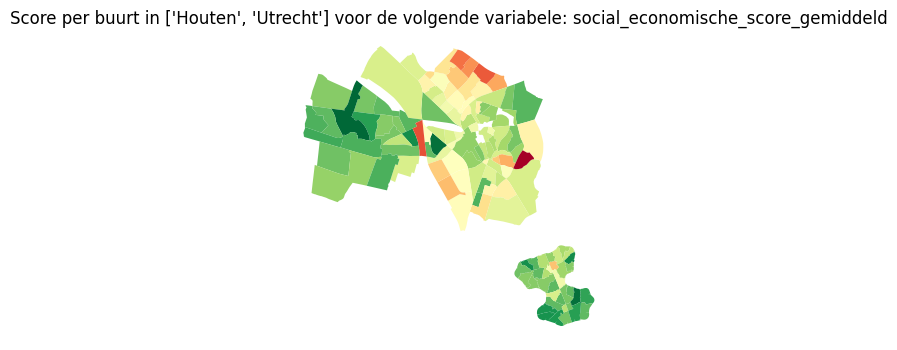

In [148]:
create_plot_var(buurten, gem_map, 'social_economische_score_gemiddeld', 'social_economische_score_gemiddeld')

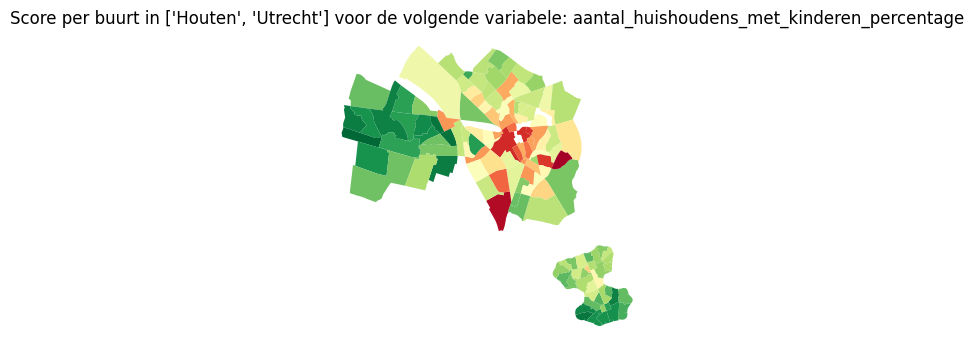

In [149]:
create_plot_var(buurten, gem_map, 'aantal_huishoudens_met_kinderen_percentage', 'aantal_huishoudens_met_kinderen_percentage')

LET OP: groen is goed/laag verbruik!


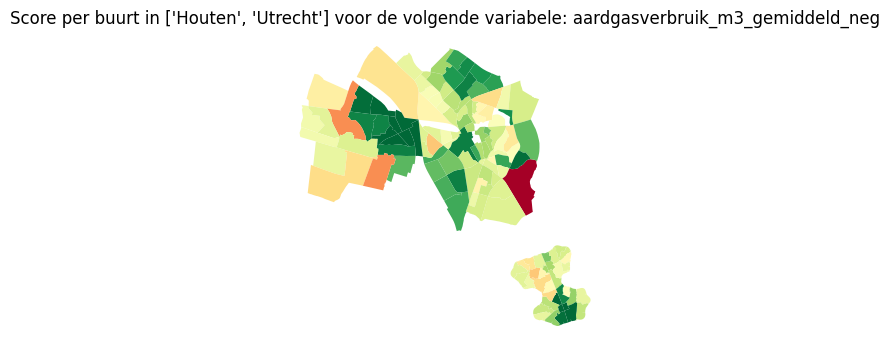

In [150]:
buurten['aardgasverbruik_m3_gemiddeld_neg'] = buurten['aardgasverbruik_m3_gemiddeld'] * -1
print('LET OP: groen is goed/laag verbruik!')
create_plot_var(buurten, gem_map, 'aardgasverbruik_m3_gemiddeld_neg', 'aardgasverbruik_m3_gemiddeld_neg')


In [151]:
# subset = pd.DataFrame(buurten[['buurt_code', 'koopwoning_percentage']])
# geometry = gem_map[['geometry', 'BU_CODE']]
# geometry = geometry.merge(buurt_id, left_on='BU_CODE', right_on='buurt_code')
# explore = geometry.merge(subset, left_on='BU_CODE', right_on='buurt_code', how='left')
# explore = explore[explore.columns[explore.columns.isin(features_visualisatie)]]

# explore_interaction = explore.explore(popup=True)
# explore_interaction.save('recommendations_map.html')
# webbrowser.open('file://' + os.path.realpath('recommendations_map.html'))
